In [1]:
# https://www.kaggle.com/code/kanncaa1/pytorch-tutorial-for-deep-learning-lovers/notebook

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

[]


In [3]:
# import numpy library
import numpy as np

# numpy array
array = [[1,2,3], [4,5,6]]
first_array = np.array(array)
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [4]:
# import pytorch library
import torch

# pytorch array
tensor = torch.Tensor(array) # numpy to torch
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7c54ea9744f0>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


Allocation
- np.ones() = torch.ones()
- np.random.rand = torch.rand()

In [10]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3))))

# pytorch ones
print(torch.ones(2,3))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [11]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.81213217 0.06968712 0.49478325]
 [0.35371757 0.98045784 0.74853809]]

tensor([[0.6646, 0.8741, 0.5528],
        [0.0409, 0.7213, 0.5725]])


conversion between tensor and numpy
- torch.from_numpy(): from numpy to tensor
- numpy(): from tensor to numpy

In [12]:
# random numpy array
array = np.random.rand(2,3)
print("{} {}\n".format(type(array), array))

# from numpy to tensor
from_np_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_np_to_tensor))

# from tensor to numpy
tensor = from_np_to_tensor
from_tensor_to_np = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_np), from_tensor_to_np))

<class 'numpy.ndarray'> [[0.22982725 0.52310333 0.41849335]
 [0.19852002 0.7303671  0.57989904]]

tensor([[0.2298, 0.5231, 0.4185],
        [0.1985, 0.7304, 0.5799]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.22982725 0.52310333 0.41849335]
 [0.19852002 0.7303671  0.57989904]]



Basic Math with Pytorch
- Resize: view()
- Addition: torch.add(a,b) = a + b
- Subtraction: a.sub(b) = a - b
- Element wise multiplication = torch.mul(a,b) = a * b
- Element wise division: torch.div(a,b) = a / b
- Mean: a.mean()
- Standard Deviation: a.std()

In [14]:
# create tensor
tensor = torch.ones(3,3)
print("\n", tensor)

# Resize
print("Resize: {}\n".format(tensor.view(9).shape, tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor, tensor)))

# Subtraction
print("Subtraction: {}\n".format(torch.sub(tensor, tensor)))

# Element wise multiplication
print("mul: {}\n".format(tensor*tensor))

# Element wise division
print("div: {}\n".format(tensor/tensor))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}\n".format(tensor.mean()))

# Std
print("Std: {}\n".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Resize: torch.Size([9])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

mul: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

div: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0

Std: 1.5811388492584229



Variables
- It accumulates gradients.
- Difference between variables and tensor is variable accumulates gradients.
- In order to make backward propagation we need variables
### 지금은 사용 안 함! (Tensor로 통일)

In [ ]:
# import variables from pytorch library
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

Linear Regression
- y = Ax + B
    - A = 기울기
    - B = bias

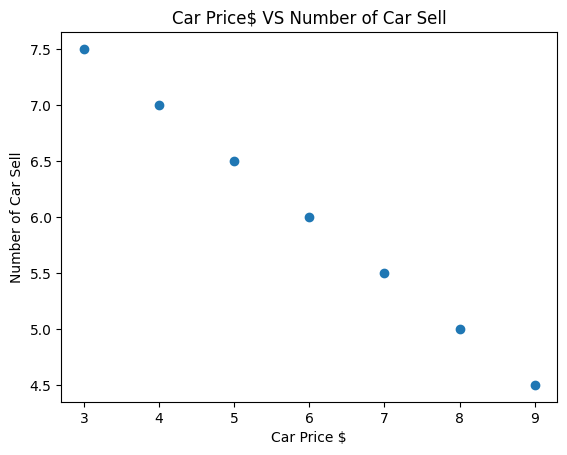

In [21]:
# Ex. 자동차의 가격과 판매량의 상관관계
# define car prices
car_prices = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices, dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1) # shape (7,1)
car_price_tensor = torch.from_numpy(car_price_np) # Tensor

# define number of car sell
num_of_car_sell = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
num_of_car_sell_np = np.array(num_of_car_sell, dtype=np.float32)
num_of_car_sell_np = num_of_car_sell_np.reshape(-1,1)
num_of_car_sell_tensor = torch.from_numpy(num_of_car_sell_np)

# visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices, num_of_car_sell) # 산점도 그리기
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

- Question. What will be number of car sell if the car price is 100$
- In order to solve this question we need to use linear regression.
- **Steps of Linear Regression**
    1. create LinearRegression class
    2. define model from this LinearRegression class
    3. MSE: Mean squared error
    4. Optimization(SGD)
    5. Backpropagation
    6. Prediction

epoch 0, loss 13.522188186645508
epoch 50, loss 6.449102878570557
epoch 100, loss 4.35792875289917
epoch 150, loss 2.944835662841797
epoch 200, loss 1.989950180053711
epoch 250, loss 1.344692587852478
epoch 300, loss 0.9086637496948242
epoch 350, loss 0.6140228509902954
epoch 400, loss 0.4149208068847656
epoch 450, loss 0.2803787887096405
epoch 500, loss 0.18946409225463867
epoch 550, loss 0.12802858650684357
epoch 600, loss 0.08651403337717056
epoch 650, loss 0.05846155434846878
epoch 700, loss 0.03950515761971474
epoch 750, loss 0.026695353910326958
epoch 800, loss 0.01803893968462944
epoch 850, loss 0.012189619243144989
epoch 900, loss 0.008237207308411598
epoch 950, loss 0.005566309206187725


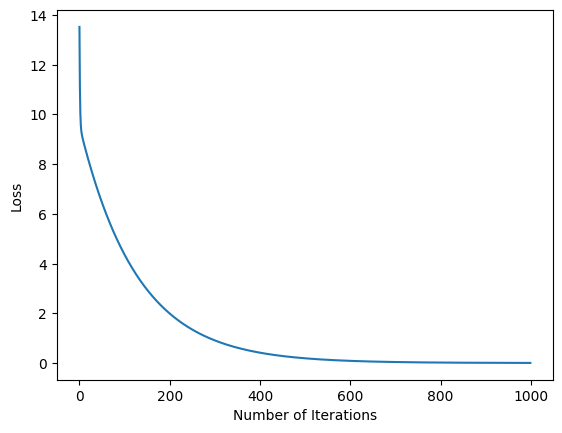

In [27]:
# Linear Regression with Pytorch

# libraries
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore") 

# create class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        # Linear function
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        return self.linear(x)
        
# define model
input_size = 1
output_size = 1
model = LinearRegression(input_size, output_size)

# MSE
mse = nn.MSELoss()

# Optimizer (find parameters that mimize error)
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# train model 
loss_list = []
epochs = 1000
for epoch in range(epochs):
    # optimization
    optimizer.zero_grad()
    
    # Forward
    results = model(car_price_tensor)
    
    # Calculate loss
    loss = mse(results, num_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # store loss
    loss_list.append(loss.data)
    
    # Updating parameters
    optimizer.step()
    
    # print loss
    if(epoch % 50 == 0):
        print('epoch {}, loss {}'.format(epoch, loss.data))
        
plt.plot(range(epochs), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

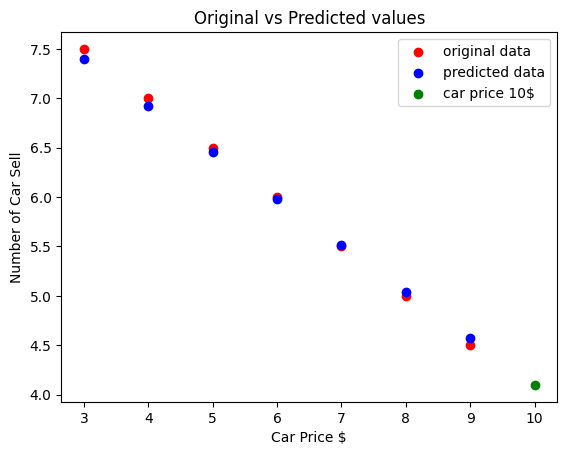

In [28]:
# predict our car price
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices, num_of_car_sell, label = "original data", color="red")
plt.scatter(car_prices, predicted, label = "predicted data", color="blue")

# predicted if car price is 10$, what will be the number of car sell
predicted_10 = model(torch.Tensor([10])).data.numpy()
plt.scatter(10, predicted_10.data, label="car price 10$", color="green")

plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

Logistic Regression
- classification에서는 logistic regression을 사용함
- linear regression + logistic function(softmax) = logistic regression
- Steps of Logistic Regression
    1. Import libraries
    2. Prepare Dataset
    3. Creat Logistic Regression Model
    4. Insantiate Model
    5. Instantiate Loss
    6. Instantiate Optimizer
    7. Training the Model 
    8. Prediction 

In [52]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

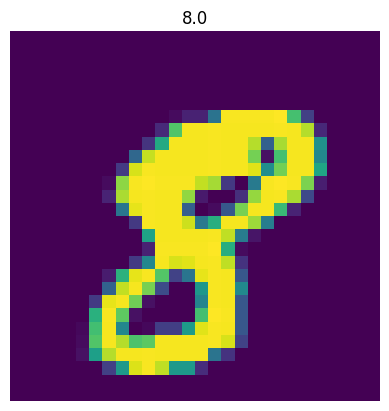

In [37]:
# Prepare Dataset
# load data
train = pd.read_csv(r"../input/train-csv/train.csv", dtype=np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_np = train.label.values
features_np = train.loc[:, train.columns != "label"].values/255 # normalization

# train test split (8:2)
features_train, features_test, targets_train, targets_test = train_test_split(features_np, targets_np, test_size=0.2, random_state = 42)

# create feature and targets tensor for train set.
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
epochs = n_iters / (len(features_train) / batch_size)
epochs = int(epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_np[10].reshape(28, 28))
plt.axis("off")
plt.title(str(targets_np[10]))
plt.savefig('graph.png')
plt.show()

In [56]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegressionModel, self).__init__()
        # Linear Part
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_size = 28 * 28 # size of image px*px
output_size = 10 # labels 0~9

# create logistic regression model
model = LogisticRegressionModel(input_size, output_size)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


In [58]:
# Training the model
count = 0
loss_list = []
iteration_list = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate loss
        loss = error(outputs, labels)
        
        # back propagation
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        count += 1
        
        # prediction
        if count % 50 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = images.view(-1, 28*28)
                outputs = model(test)
                 # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                # Total number of labels
                total += len(labels)
                # Total correct predictions
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            print('Iteration: {} Loss: {} Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500 Loss: 1.851850152015686 Accuracy: 67.9047622680664%
Iteration: 1000 Loss: 1.5998497009277344 Accuracy: 75.41666412353516%
Iteration: 1500 Loss: 1.301825761795044 Accuracy: 78.4047622680664%
Iteration: 2000 Loss: 1.1881202459335327 Accuracy: 80.03571319580078%
Iteration: 2500 Loss: 1.0366549491882324 Accuracy: 81.26190185546875%
Iteration: 3000 Loss: 0.9348894357681274 Accuracy: 82.26190185546875%
Iteration: 3500 Loss: 0.8953497409820557 Accuracy: 82.75%
Iteration: 4000 Loss: 0.7468474507331848 Accuracy: 83.26190185546875%
Iteration: 4500 Loss: 0.9628443121910095 Accuracy: 83.60713958740234%
Iteration: 5000 Loss: 0.8017759919166565 Accuracy: 83.95237731933594%
Iteration: 5500 Loss: 0.7629673480987549 Accuracy: 84.21428680419922%
Iteration: 6000 Loss: 0.8614060878753662 Accuracy: 84.48809814453125%
Iteration: 6500 Loss: 0.6559834480285645 Accuracy: 84.78571319580078%
Iteration: 7000 Loss: 0.7195443511009216 Accuracy: 85.04762268066406%
Iteration: 7500 Loss: 0.6351224184036

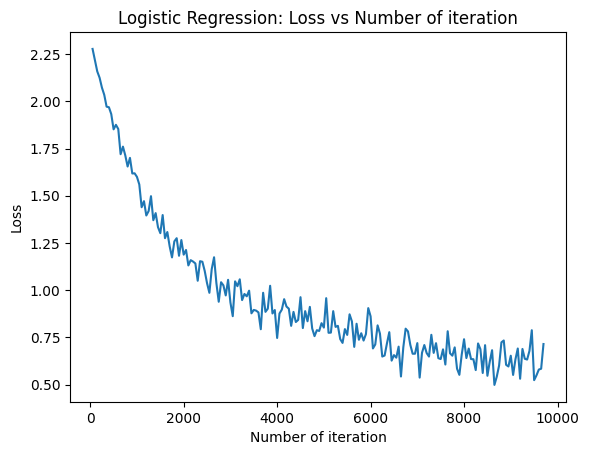

In [59]:
# visualization
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

In [ ]:
ANN
- 모델의 complexity를 높이기 위해 non linear functions를 hidden layer로 추가
- What we expect from artificial neural network is that when complexity increases, we use more hidden layers and our model can adapt better. As a result accuracy increase.

In [61]:
# Create ANN Model
class ANNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2 : 150 --> 150
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.tanh2(out)
        out = self.fc3(out)
        out = self.elu3(out)
        out = self.fc4(out)
        return out
    
# instantiate ANN
input_size = 28*28
hidden_size = 150
output_size = 10

# create model
model = ANNModel(input_size, hidden_size, output_size)

# cross entropy loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [64]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()
        count += 1
        
        if count % 50 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            # predict test accuracy
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted==labels).sum()
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            print('Iteration: {} Loss: {} Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500 Loss: 0.6858441233634949 Accuracy: 81.66666412353516%
Iteration: 1000 Loss: 0.4307785928249359 Accuracy: 87.75%
Iteration: 1500 Loss: 0.22098512947559357 Accuracy: 89.58333587646484%
Iteration: 2000 Loss: 0.2907167971134186 Accuracy: 90.6547622680664%
Iteration: 2500 Loss: 0.3256334662437439 Accuracy: 91.97618865966797%
Iteration: 3000 Loss: 0.11131341010332108 Accuracy: 92.51190185546875%
Iteration: 3500 Loss: 0.2704867124557495 Accuracy: 93.27381134033203%
Iteration: 4000 Loss: 0.06618453562259674 Accuracy: 93.79762268066406%
Iteration: 4500 Loss: 0.3325413465499878 Accuracy: 94.10713958740234%
Iteration: 5000 Loss: 0.10531295835971832 Accuracy: 94.36904907226562%
Iteration: 5500 Loss: 0.19766469299793243 Accuracy: 94.61904907226562%
Iteration: 6000 Loss: 0.22758427262306213 Accuracy: 94.70237731933594%
Iteration: 6500 Loss: 0.10499463230371475 Accuracy: 95.32142639160156%
Iteration: 7000 Loss: 0.12106020748615265 Accuracy: 95.57142639160156%
Iteration: 7500 Loss: 0.10

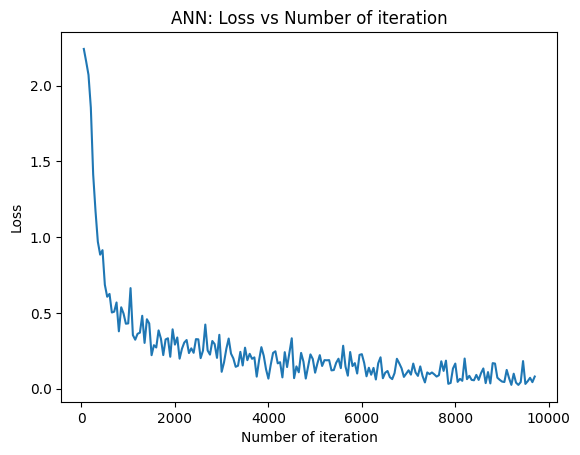

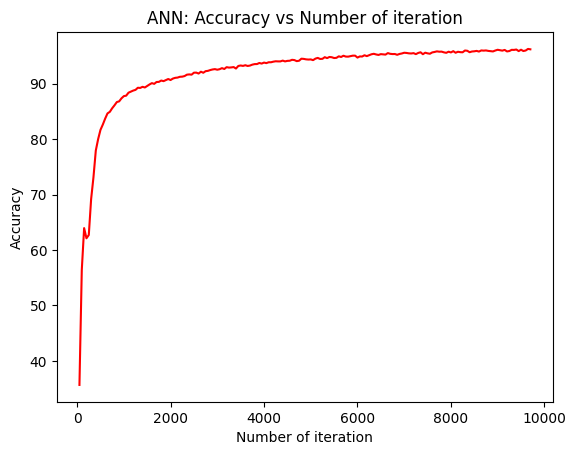

In [65]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()